In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Load data
df = pd.read_pickle('timeData.pkl')

In [3]:
# Process data
## Fill missing values with cutoff time
CUTOFF = 180
timeCols = ['brute_time', 'astar_time', 'greedy_time']
df[timeCols] = df[timeCols].fillna(value=CUTOFF)

## Split data into runs
singleRun = df[:22]
repeatRun = df[22:].reset_index()

<IPython.core.display.Javascript object>


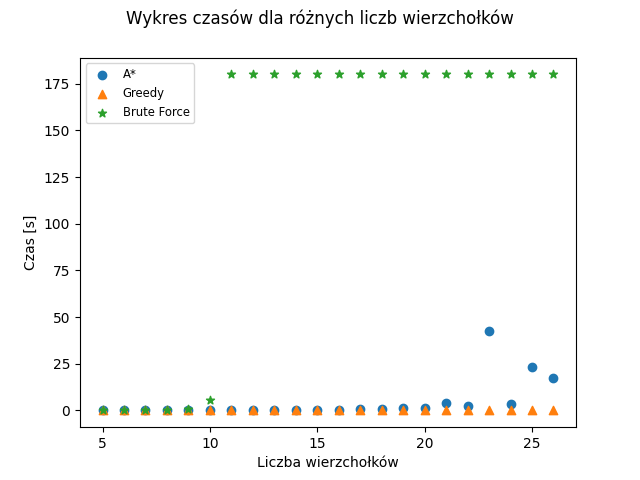

In [21]:
# Viusalize single run
fig = plt.figure()
fig.suptitle('Wykres czasów dla różnych liczb wierzchołków')
plt.scatter(singleRun['nodes_number'], singleRun['astar_time'], label='A*')
plt.scatter(singleRun['nodes_number'], singleRun['greedy_time'], label='Greedy', marker='^')
plt.scatter(singleRun['nodes_number'], singleRun['brute_time'], label='Brute Force', marker='*')
fig.axes[0].set_xlabel('Liczba wierzchołków')
fig.axes[0].set_ylabel('Czas [s]')
plt.legend(fontsize='small')
fig.savefig('plots/comparsion.png')
plt.show()

<IPython.core.display.Javascript object>


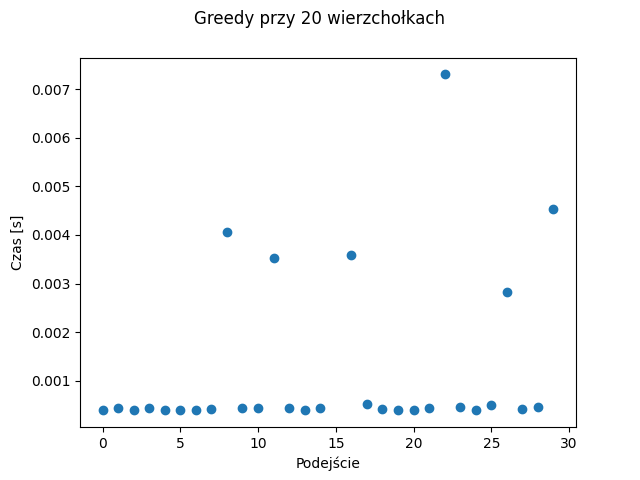

<IPython.core.display.Javascript object>


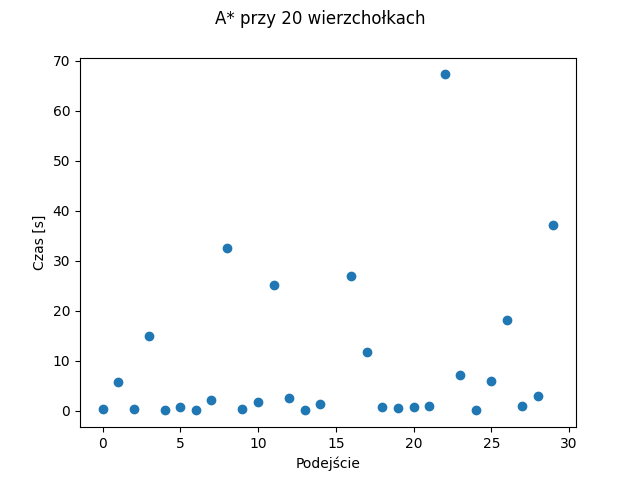

In [23]:
# Visualize repeat run
fig = plt.figure()
fig.suptitle('Greedy przy 20 wierzchołkach')
plt.scatter(repeatRun.index, repeatRun['greedy_time'])
fig.axes[0].set_ylabel('Czas [s]')
fig.axes[0].set_xlabel('Podejście')
fig.savefig('plots/greedy.png')
plt.show()
fig = plt.figure()
fig.suptitle('A* przy 20 wierzchołkach')
plt.scatter(repeatRun.index, repeatRun['astar_time'])
fig.axes[0].set_ylabel('Czas [s]')
fig.axes[0].set_xlabel('Podejście')
fig.savefig('plots/astar.png')
plt.show()

In [6]:
# Length comparison
## Filter
repeatRun = repeatRun.dropna(subset=['astar_length'])
repeatRun['percentage'] = (repeatRun['greedy_length'] - repeatRun['astar_length'])/repeatRun['astar_length']*100
repeatRun['percentage'].mean()

17.855200489909574